In [162]:
import numpy as np

# MINRES iterative solver
from scipy.sparse.linalg import minres

# artificial low-rank matrix A = |x><x|, where x is a random vector of dimension N, and <x|x>=1.
# Ax=b, where b=|x>. Solve for x. Exact solution is |x>.
N = 10
b = np.random.rand(N)
b = b/np.linalg.norm(b)
A = np.outer(b, b)
print(f'Ax=b, where A=|x><x|, b=|x>. Solve for x. Assume exact pseudo-inverse solution is |x>.')
print(f'Shape of A: {A.shape}, Rank(A): {np.linalg.matrix_rank(A)}')

# initialize x to be zero vector
x0 = np.zeros(N)
# x0 = np.random.rand(N)
print(f'\nInitial guess: x0={x0}')
# solve Ax=b using MINRES
x, exitCode = minres(A, b, x0=x0)
shift = 1e-5
y, exitCode = minres(A, b, x0=x0, shift=shift)  # shift the diagonal by 1e-3

# check the solution
print("    solution error (diag_shift=0) : ", np.abs(x-b).sum())
print(f"    solution error (diag_shift={shift}): ", np.abs(y-b).sum())

# initialize x to be random vector
x0 = np.random.rand(N)

print(f'\nInitial guess: x0={x0}')
# solve Ax=b using MINRES
# solve Ax=b using MINRES
x, exitCode = minres(A, b, x0=x0)
shift = 1e-5
y, exitCode = minres(A, b, x0=x0, shift=shift)  # shift the diagonal by 1e-3

# check the solution
print("    solution error (diag_shift=0) : ", np.abs(x-b).sum())
print(f"    solution error (diag_shift={shift}): ", np.abs(y-b).sum())

Ax=b, where A=|x><x|, b=|x>. Solve for x. Assume exact pseudo-inverse solution is |x>.
Shape of A: (10, 10), Rank(A): 1

Initial guess: x0=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    solution error (diag_shift=0) :  1.259409243559162e-15
    solution error (diag_shift=1e-05):  2.8890035605626252e-05

Initial guess: x0=[0.34962956 0.68093522 0.56074742 0.42663743 0.62131052 0.80465751
 0.67937642 0.40957323 0.52467966 0.57979014]
    solution error (diag_shift=0) :  2.1649821526264676
    solution error (diag_shift=1e-05):  2.164987850026096


In [37]:
A@b, b

(array([0.66402424, 0.05649865, 0.06444245, 0.37624823]),
 array([0.79178428, 0.06736914, 0.07684135, 0.4486394 ]))

In [6]:
x

array([0.08692288, 0.11170427, 0.11742411, 0.0157782 , 0.1288675 ,
       0.04380615, 0.0570321 , 0.10130391, 0.16327746, 0.1378418 ,
       0.02809902, 0.1010686 , 0.04854366, 0.09012003, 0.0462129 ,
       0.06624709, 0.04932089, 0.16784433, 0.09615618, 0.04676622])

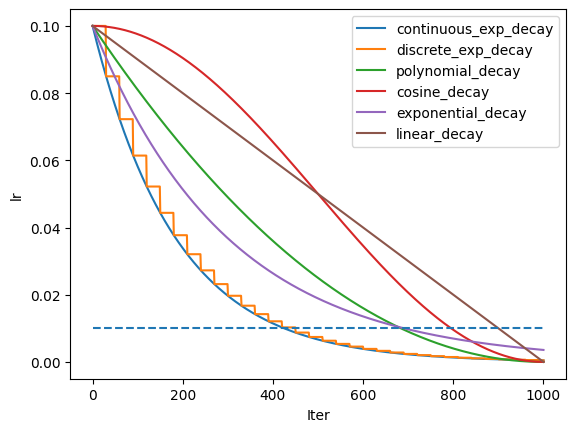

In [45]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.85
period = 30

def continuous_exp_decay(t, period=50, init_lr=1e-1, rate=0.85):
    return init_lr*np.exp(-np.log(1/rate)*t/period)

def discrete_exp_decay(t, period=50, init_lr=1e-1, rate=0.85):
    return init_lr*rate**(t//period)

def polynomial_decay(t, max_iter=1000, init_lr=1e-1, power=1.0):
    return init_lr * (1 - t / max_iter) ** power

def cosine_decay(t, max_iter=1000, init_lr=1e-1):
    return init_lr * 0.5 * (1 + np.cos(np.pi * t / max_iter))

def cosine_decay(t, max_iter=1000, init_value=1e-1):
    return init_value * 0.5 * (1 + np.cos(np.pi * t / max_iter))

def exponential_decay(t, decay_rate=0.1, decay_step=1, init_lr=1e-1):
    return init_lr * np.exp(-decay_rate * (t / decay_step))

def linear_decay(t, max_iter=1000, init_lr=1e-1):
    return init_lr * (1 - t / max_iter)



t = np.linspace(0, 1000, 1000)
plt.plot(t, continuous_exp_decay(t, period=period, rate=a), label='continuous_exp_decay')
plt.plot(t, discrete_exp_decay(t, period=period, rate=a), label='discrete_exp_decay')
plt.plot(t, polynomial_decay(t, power=2), label='polynomial_decay')
plt.plot(t, cosine_decay(t), label='cosine_decay')
plt.plot(t, exponential_decay(t, decay_rate=0.1, decay_step=30), label='exponential_decay')
plt.plot(t, linear_decay(t), label='linear_decay')

plt.hlines(1e-2, 0, 1000, linestyles='dashed')
plt.ylabel('lr')
plt.xlabel('Iter')
plt.legend()
plt.show()